In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.29'

In [2]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in specra, and combine

In [3]:
grp1=pd.read_excel('Outputed_fits.xlsx', sheet_name='Sheet1')
grp2=pd.read_excel('Outputed_fits.xlsx', sheet_name='Sheet2')
grp3=pd.read_excel('Outputed_fits.xlsx', sheet_name='Sheet4')
df2=pd.concat([grp1, grp2, grp3], axis=0)
df2.head()

,Unnamed: 0,filename,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Voigt_Gamma,Residual_Diad1,...,Diad2_Combofit_Cent,Diad2_Combofit_Height,Diad2_Voigt_Cent,Diad2_Voigt_Area,Diad2_Voigt_Sigma,Diad2_Voigt_Gamma,Residual_Diad2,Diad2_Prop_Lor,Diad2_refit,HB1_Cent
0,0,POC58,102.727425,1286.718255,119.573726,1286.718255,154.419207,0.606601,NaN,2.282336,...,1389.445681,195.199809,1389.445681,241.583363,0.567501,NaN,2.026593,7.381800e-02,False,NaN
1,0,POC56,102.729331,1286.714106,131.751518,1286.714106,174.262314,0.621278,NaN,2.924421,...,1389.443437,236.245970,1389.443437,293.381888,0.514047,NaN,2.812965,3.684211e-01,False,NaN
2,0,POC57-0.04,102.757676,1286.687839,127.269559,1286.687839,161.499927,0.596054,NaN,2.423680,...,1389.445514,212.816748,1389.445514,269.755740,0.565061,NaN,5.291010,1.580404e-01,False,NaN
3,0,POC55,102.728191,1286.707301,157.393742,1286.707301,210.778870,0.629039,NaN,2.895239,...,1389.435492,264.485681,1389.435492,322.818583,0.573316,NaN,2.884913,9.346591e-10,False,NaN
4,0,POC51,102.740746,1286.696529,183.276230,1286.696529,250.703563,0.607511,NaN,2.697510,...,1389.437275,290.470135,1389.437275,379.966886,0.581510,NaN,2.725495,1.662824e-01,False,NaN


## Combine with charlottes data

In [4]:
df_D=pd.read_excel('Fityk_results.xlsx', sheet_name='112820_FULL') 

## Compare

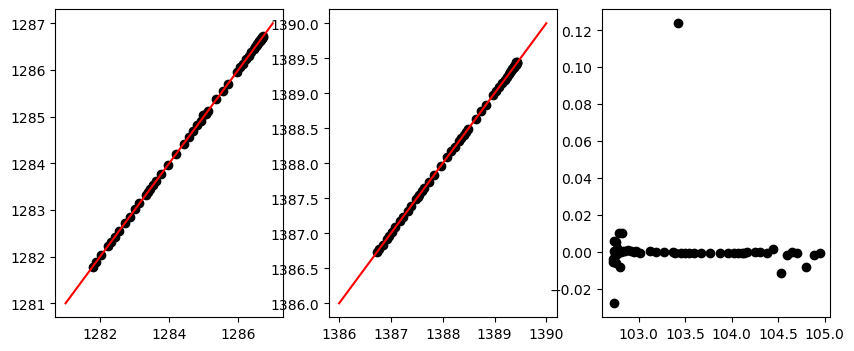

## First, get the metadata for this day

In [7]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
diad_meta=pf.get_diad_files(path=meta_path,
file_ext='txt', exclude_str='N', 
            exclude_str_2='FG', 
            exclude_str_3='Cap',
                            exclude_str_4='window',
            exclude_type='.png',   sort=True)
diad_meta

['POC1.txt',
 'POC10.txt',
 'POC11.txt',
 'POC12.txt',
 'POC13.txt',
 'POC14.txt',
 'POC15.txt',
 'POC16.txt',
 'POC17.txt',
 'POC18.txt',
 'POC19.txt',
 'POC2.txt',
 'POC20.txt',
 'POC21.txt',
 'POC22.txt',
 'POC23.txt',
 'POC24.txt',
 'POC25.txt',
 'POC26.txt',
 'POC27.txt',
 'POC28.txt',
 'POC29.txt',
 'POC3.txt',
 'POC30.txt',
 'POC31.txt',
 'POC32.txt',
 'POC33.txt',
 'POC34.txt',
 'POC35.txt',
 'POC36.txt',
 'POC37.txt',
 'POC38.txt',
 'POC39.txt',
 'POC4.txt',
 'POC40.txt',
 'POC41.txt',
 'POC42.txt',
 'POC43.txt',
 'POC44.txt',
 'POC45.txt',
 'POC46.txt',
 'POC47.txt',
 'POC48.txt',
 'POC49.txt',
 'POC5.txt',
 'POC50.txt',
 'POC51.txt',
 'POC52.txt',
 'POC53.txt',
 'POC54.txt',
 'POC55.txt',
 'POC56.txt',
 'POC57-0.04.txt',
 'POC58.txt',
 'POC6.txt',
 'POC7.txt',
 'POC8.txt',
 'POC9.txt']

## Now get all the important information out of the metadata files

In [8]:
meta=pf.stitch_metadata_in_loop(path=meta_path, 
Allfiles=diad_meta, prefix=False,
trupower=False)
meta['filename'].iloc[0]

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:01<00:00, 36.37it/s]

Done
Oof, try not to work after midnight!


'POC49.txt'

## Then get a simple file name you can stitch with the spectra

In [9]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=" ",
   file_type='.txt')
# Checks they are all unique
file_m[0]

'POC49'

## Now get filename from spectra into same form as metadata

In [10]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    prefix=False, str_prefix=" ",
    names=df2['filename'].reset_index(drop=True),
   file_type='.txt')

file_s

array(['POC58', 'POC56', 'POC57-0.04', 'POC55', 'POC51', 'POC54', 'POC53',
       'POC50', 'POC52', 'POC49', 'POC48', 'POC47', 'POC46', 'POC45',
       'POC44', 'POC43', 'POC42', 'POC41', 'POC40', 'POC39', 'POC30',
       'POC38', 'POC20', 'POC29', 'POC37', 'POC19', 'POC25', 'POC26',
       'POC24', 'POC23', 'POC28', 'POC18', 'POC22', 'POC27', 'POC21',
       'POC36', 'POC17', 'POC35', 'POC11', 'POC16', 'POC15', 'POC34',
       'POC10', 'POC9', 'POC14', 'POC13', 'POC33', 'POC12', 'POC32',
       'POC31', 'POC8', 'POC1', 'POC7', 'POC6', 'POC5', 'POC4', 'POC2',
       'POC3'], dtype=object)

In [11]:
# Combining them together
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

In [12]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_Example_cali.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [13]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [16]:
df_combo

,Unnamed: 0,Corrected_Splitting,filename_x,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Voigt_Gamma,...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,0,102.790730,POC58,102.727425,1286.718255,119.573726,1286.718255,154.419207,0.606601,NaN,...,29.0,NaN,90.0,5.0,5.0,"['0h', '7m', '32s']",1:20:58 AM\n,91258.0,1341.0,1.000616
1,0,102.792470,POC56,102.729331,1286.714106,131.751518,1286.714106,174.262314,0.621278,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",1:01:55 AM\n,90115.0,1341.0,1.000615
2,0,102.820909,POC57-0.04,102.757676,1286.687839,127.269559,1286.687839,161.499927,0.596054,NaN,...,29.0,NaN,90.0,5.0,5.0,"['0h', '7m', '32s']",1:10:45 AM\n,90645.0,1341.0,1.000615
3,0,102.791266,POC55,102.728191,1286.707301,157.393742,1286.707301,210.778870,0.629039,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:54:26 AM\n,89666.0,1341.0,1.000614
4,0,102.803535,POC51,102.740746,1286.696529,183.276230,1286.696529,250.703563,0.607511,NaN,...,29.0,NaN,60.0,3.0,5.0,"['0h', '3m', '2s']",12:17:28 AM\n,87448.0,1341.0,1.000611
5,0,102.822214,POC54,102.759181,1286.683946,184.034094,1286.683946,242.334955,0.618523,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:46:57 AM\n,89217.0,1341.0,1.000613
6,0,102.823660,POC53,102.760689,1286.675364,220.627910,1286.675364,287.688146,0.602742,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:39:13 AM\n,88753.0,1341.0,1.000613
7,0,102.788804,POC50,102.726082,1286.691039,256.911938,1286.691039,340.578949,0.601709,NaN,...,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",12:09:42 AM\n,86982.0,1341.0,1.000611
8,0,102.797777,POC52,102.734883,1286.689150,247.355325,1286.689150,319.727982,0.592430,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '31s']",12:31:31 AM\n,88291.0,1341.0,1.000612
9,0,102.809660,POC49,102.746974,1286.664006,372.146576,1286.664006,502.530180,0.608254,NaN,...,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",12:02:59 AM\n,86579.0,1341.0,1.000610


In [18]:
df_combo['Measurement']=df_combo['filename_x']
dfs_merge=pd.merge(df_D, df_combo, on='Measurement')

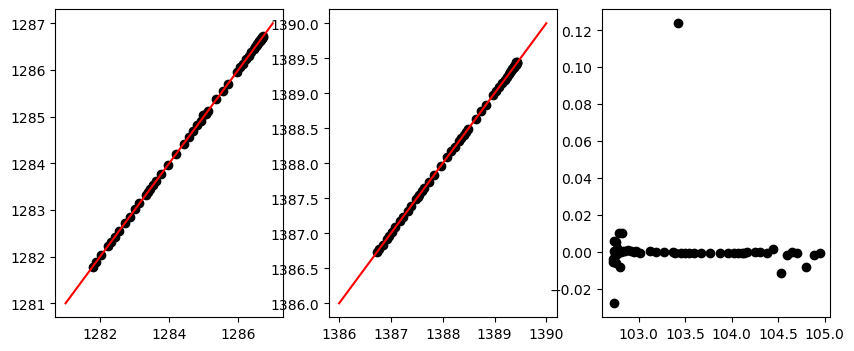

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.plot(dfs_merge['1285cm-1'], dfs_merge['Diad1_Combofit_Cent'], 'ok')
ax1.plot([1281, 1287], [1281, 1287], '-r')

ax2.plot(dfs_merge['1389cm-1'], dfs_merge['Diad2_Combofit_Cent'], 'ok')
ax2.plot([1386, 1390], [1386, 1390], '-r')

ax3.plot(dfs_merge['∆CO2 uncorr (cm-1)'], dfs_merge['∆CO2 uncorr (cm-1)']-dfs_merge['Splitting'], 'ok')
#ax3.plot([102, 105], [102, 105], '-r')

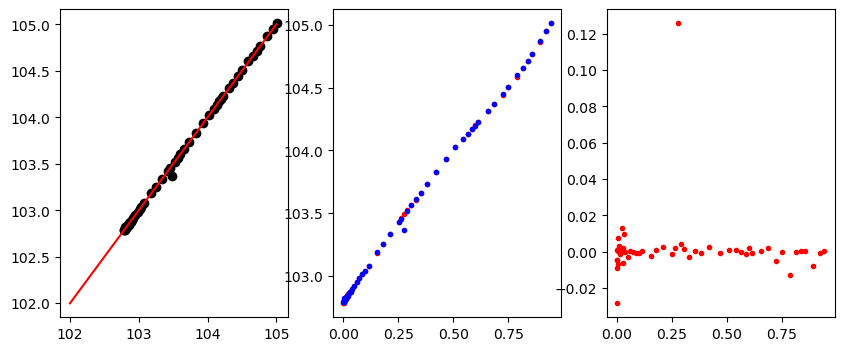

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

ax1.plot(dfs_merge['∆CO2 corr (cm-1-Lam)'], dfs_merge['Corrected_Splitting'], 'ok')
ax1.plot([102, 105], [102, 105], '-r')

ax2.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['∆CO2 corr (cm-1-Lam)'],
         '.r')

ax2.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['Corrected_Splitting'],
         '.b')

ax3.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['∆CO2 corr (cm-1-Lam)']-dfs_merge['Corrected_Splitting'],
         '.r')